# 1. Creating Dataset

In [18]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [54]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).view(100,1)

In [40]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0,1])
    plt.scatter(X[y==1, 0], X[y==1,1])

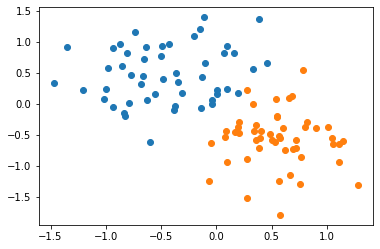

In [41]:
scatter_plot()

# 2. Model Setup

In [80]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0
    
    def reset_parameters(self):
        self.linear.reset_parameters()

In [61]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [34]:
[w,b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
    return w1.item(), w2.item(), b1.item()

In [43]:
def plot_fit(title):
    plt.title = title
#     0 = w1x1 + w2x2 + b
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 +b1)/-w2
    plt.plot(x1, x2, "r")
    scatter_plot()

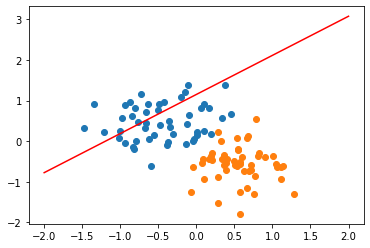

In [44]:
plot_fit("Initial Model")

# 3. Model Training

In [71]:
model.reset_parameters()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [72]:
epochs = 2000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print(f"epoch: {i} loss: {loss.item()}")
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch: 0 loss: 0.9092632532119751
epoch: 1 loss: 0.9072257876396179
epoch: 2 loss: 0.9051949977874756
epoch: 3 loss: 0.9031704068183899
epoch: 4 loss: 0.9011523723602295
epoch: 5 loss: 0.8991405963897705
epoch: 6 loss: 0.897135317325592
epoch: 7 loss: 0.8951363563537598
epoch: 8 loss: 0.8931437730789185
epoch: 9 loss: 0.8911575078964233
epoch: 10 loss: 0.8891776204109192
epoch: 11 loss: 0.8872039914131165
epoch: 12 loss: 0.8852366805076599
epoch: 13 loss: 0.8832757472991943
epoch: 14 loss: 0.881321132183075
epoch: 15 loss: 0.8793727159500122
epoch: 16 loss: 0.8774304986000061
epoch: 17 loss: 0.8754945993423462
epoch: 18 loss: 0.8735649585723877
epoch: 19 loss: 0.8716415166854858
epoch: 20 loss: 0.8697242736816406
epoch: 21 loss: 0.8678132891654968
epoch: 22 loss: 0.8659084439277649
epoch: 23 loss: 0.8640098571777344
epoch: 24 loss: 0.8621172904968262
epoch: 25 loss: 0.8602308630943298
epoch: 26 loss: 0.8583507537841797
epoch: 27 loss: 0.8564766645431519
epoch: 28 loss: 0.85460859537124

epoch: 1082 loss: 0.26890644431114197
epoch: 1083 loss: 0.268768310546875
epoch: 1084 loss: 0.26863038539886475
epoch: 1085 loss: 0.26849260926246643
epoch: 1086 loss: 0.2683551013469696
epoch: 1087 loss: 0.2682177424430847
epoch: 1088 loss: 0.26808059215545654
epoch: 1089 loss: 0.26794368028640747
epoch: 1090 loss: 0.2678069472312927
epoch: 1091 loss: 0.2676703929901123
epoch: 1092 loss: 0.2675340473651886
epoch: 1093 loss: 0.2673979103565216
epoch: 1094 loss: 0.26726195216178894
epoch: 1095 loss: 0.267126202583313
epoch: 1096 loss: 0.26699063181877136
epoch: 1097 loss: 0.26685526967048645
epoch: 1098 loss: 0.26672011613845825
epoch: 1099 loss: 0.2665851414203644
epoch: 1100 loss: 0.26645034551620483
epoch: 1101 loss: 0.266315758228302
epoch: 1102 loss: 0.2661813497543335
epoch: 1103 loss: 0.2660471200942993
epoch: 1104 loss: 0.2659131586551666
epoch: 1105 loss: 0.2657793462276459
epoch: 1106 loss: 0.26564571261405945
epoch: 1107 loss: 0.26551228761672974
epoch: 1108 loss: 0.265379041

Text(0.5, 0, 'epoch')

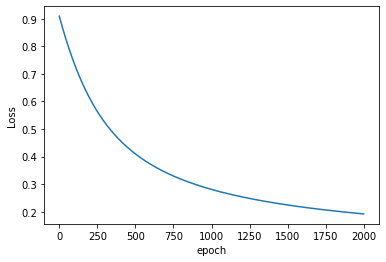

In [73]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

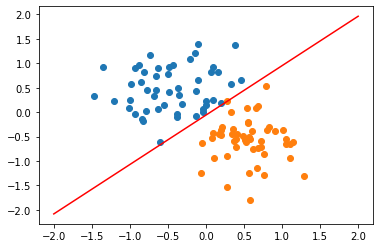

In [74]:
plot_fit("Trained Model")

# 3. Predict New Data

Green point positive probability:0.9758965969085693
Red point positive probability:0.017375411465764046


AttributeError: 'Model' object has no attribute 'predict'

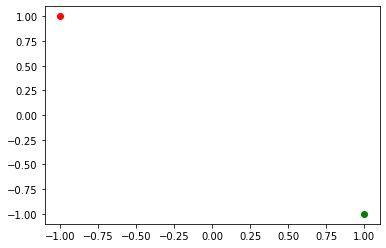

In [81]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1[0], point1[1], "go")
plt.plot(point2[0], point2[1], "ro")
print(f"Green point positive probability:{model.forward(point1).item()}")
print(f"Red point positive probability:{model.forward(point2).item()}")
print(f"Green point in class {model.predict(point1)}")
print(f"Red point in class {model.predict(point2)}")
plot_fit("Trained Model")